## 1. Problm Understanding

As we have seen manier times around us that people are confused about which company they should look for and which companies are really worth joining , other than FAANG's and other major product based or service based companies. In my friend circle, as a fresher I felt the same confusion among my friends and other peers too.

The basic way of figuring this out is to look for the reviews and rating given to the companies . But sometimes it's hard to really rely upon the reviews and ratings. The question arises " what if the ratings are tampered or fake? ". 

### **So to overcome this problem we can use Machine Learning in predicting/Classifying the correct rating of the companies one is looking for.**

But for any ML problem we need data. In this project I'll be using the technique 'Job scraping'  for collecting or scraping data from the website.


* **Job scraping** is to gather job posting information online in a programmatic manner. This automated way of extracting data from the web helps people get jobs data efficiently and build a resourceful job database by integrating various data sources into one. 
* Job scraping is the use case of web scraping in the job area and job data parsing, analyzing, and managing may come after the extraction process is done.

*But the question arises how and where to fetch job data?*

* So as we know that , there are already many websites which gives updates about job opening and job roles , specially after covid the number has increased rapidly. Company's career pages, giant big boards like Monster, Glassdoor, or Indeed, personal job aggregator websites are example of it. From all these sources, job scraping can easily get us information such as job title, job description, location , Ratings and reviews , etc.  


* Here in this project I'm gonna use the webite called **AmbitionBox.com** which is a 2015 startup. A career advisory platform founded in 2015. Their vision is to empower people in achieving their career aspirations. With 20 Lakh+ Company reviews, 40 Lakh+ Salaries and 2 Lakh+ Interview questions, AmbitionBox helps more than 15 Lakh people every month to make informed career choices.

AmbitionBox.com : https://www.ambitionbox.com/

InterFace of the Website looks like this:
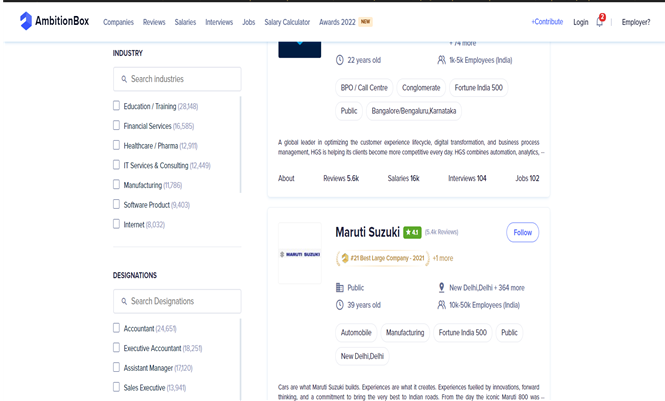

## 2. Data Acquisition
### 2.1 Code for scraping data from website

In [1]:
# Importing Libraries 

import pandas as pd
import requests 
from bs4 import BeautifulSoup # Lib used for web scraping 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This is the HTML code of the given website

# webpage = requests.get('https://www.naukri.com/allcompanies?categoryId=101&title=MNCs%20actively%20hiring&qcount=20&src=discovery_orgExploreCompanies_homepage_srch&searchType=companySearch&pageNo=1&qcbusinessSize=62&qcbusinessSize=213&qcbusinessSize=217').text

webpage = requests.get('https://www.ambitionbox.com/list-of-companies').text

In [3]:
webpage

'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head >\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n    <title>List of companies - 649.1k companies | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2022 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta data-n-head="ssr" name="application-name" content="AmbitionBox"><meta data-n-head="ssr" name="content-language" content="EN"><meta data-n-head="ssr" name="google-signin-client_id" content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com"><meta data-n-head="ssr" property="fb:app_id" content="712617688793459"><meta data-n-head="ssr" name="theme-color" content="#ffffff"><meta data-n-head="ssr" name="msapplication-navbutton-color" content="#ffffff"><meta data-n-head="ssr" na

In [4]:
soup = BeautifulSoup(webpage,"lxml")
# lxml provides a very simple and powerful API for parsing XML and HTML. 
#It supports one-step parsing as well as step-by-step parsing using an event-driven API`aa`

In [5]:
print(soup.prettify()) # Format the HTML page as it is written

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   List of companies - 649.1k companies | AmbitionBox
  </title>
  <meta content="2022 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/>
  <meta content="712617688793459" data-n-head="ssr" property="fb:app_id"/>
  <meta content="#ffffff" data-n-head="ssr" name="theme-color"/>
  <meta content="#ffffff" data-n-head="ssr" name="msapplication-navbutton-color"/

In [6]:
# 'h1' is a list which has test = "List of companies in India" in it.
soup.find_all('h1')

[<h1 class="bold-title-l title">List of companies in India</h1>]

In [7]:
soup.find_all('h1')[0].text  # This is how we grab the text from the list.

'List of companies in India'

Like the above method, we can grab the text from the list 'h2' also which has the names of the companies

In [8]:
for i in soup.find_all('h2'):
    print(i.text.strip())   

TCS
Accenture
Cognizant
ICICI Bank
Wipro
HDFC Bank
Capgemini
HCL Technologies
Infosys
Tech Mahindra
Genpact
Axis Bank
IBM
Concentrix Corpo...
Amazon
Larsen & Toubro ...
Reliance jio
Vodafone Idea
HDB Financial Se...
Teleperformance
Kotak Mahindra B...
Reliance Industr...
Bharti Airtel
Tata Motors
Deloitte
Reliance Retail
Mahindra & Mahin...
IndusInd Bank
WNS
DXC Technology


In [9]:
a = [] # List for all the companies
for i in soup.find_all('h2'):
    #print(i.text.strip())
    a.append(i.text.strip())
print(a)

['TCS', 'Accenture', 'Cognizant', 'ICICI Bank', 'Wipro', 'HDFC Bank', 'Capgemini', 'HCL Technologies', 'Infosys', 'Tech Mahindra', 'Genpact', 'Axis Bank', 'IBM', 'Concentrix Corpo...', 'Amazon', 'Larsen & Toubro ...', 'Reliance jio', 'Vodafone Idea', 'HDB Financial Se...', 'Teleperformance', 'Kotak Mahindra B...', 'Reliance Industr...', 'Bharti Airtel', 'Tata Motors', 'Deloitte', 'Reliance Retail', 'Mahindra & Mahin...', 'IndusInd Bank', 'WNS', 'DXC Technology']


### All the companies on the First page

In [10]:
len(a) # there are 30 unique companies on the first page.

30

Simililarly we can extract the other information about the companies from list "p".

In [11]:
soup.find_all('p')

[<p>Rate &amp; help your company win an award!</p>,
 <p class="text" style="color:#040a1e;">
 					AmbitionBox
 				</p>,
 <p class="typeahead-title bold-display-l" style="line-height:normal;color:#1e223c;">
 		Discover Best Places to Work!
 	</p>,
 <p class="subtitle" style="color:#1e223c;">Company reviews. Salaries. Interviews. Jobs.</p>,
 <p data-v-6a0700ed="">About Company</p>,
 <p class="sbold-section-header subtitle">
 			649,089 unique
 			companies found
 		</p>,
 <p class="sbold-list-header">Sort By: </p>,
 <p class="bold-list-header show-flex">
 							Popular
 							<i class="icon-chevron-right"></i></p>,
 <p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 								3.9
 							</p>,
 <p data-v-367fae30="">#6 Best Mega Company - 2021</p>,
 <p class="infoEntity sbold-list-header"><i class="icon-domain"></i>
 						Public
 					</p>,
 <p class="infoEntity sbold-list-header"><i class="icon-pin-drop"></i>
 						Mumbai,Maharashtra + 244 more
 					</p>,
 <p c

Since we can see that this list has lot many information in it like location of company , No of employees , reviews , etc in the list. 
So our target would be fetching the review from this list.

**So we'll use the class name as 'ratings'. we can see the same in the image below**

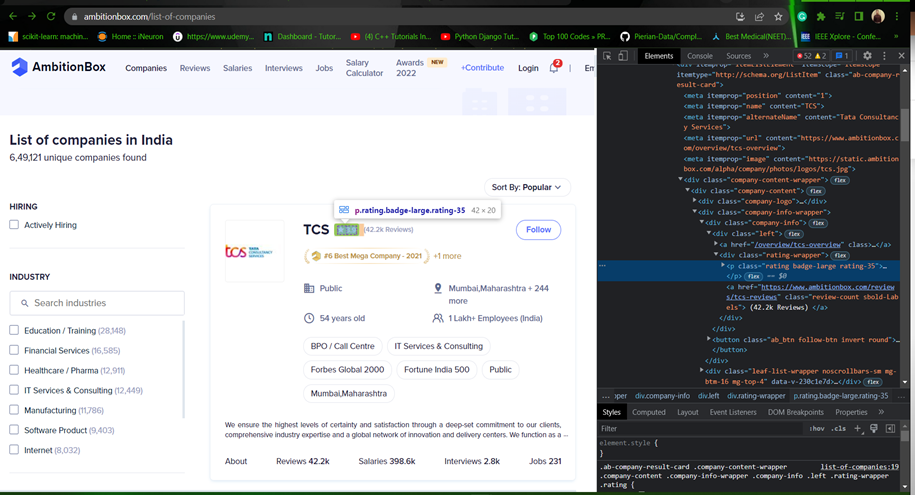

In [12]:
soup.find_all('p', class_ = 'rating')

[<p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 								3.9
 							</p>,
 <p class="rating badge-large rating-4"><i class="icon icon-star"></i>
 								4.1
 							</p>,
 <p class="rating badge-large rating-4"><i class="icon icon-star"></i>
 								4.0
 							</p>,
 <p class="rating badge-large rating-4"><i class="icon icon-star"></i>
 								4.0
 							</p>,
 <p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 								3.9
 							</p>,
 <p class="rating badge-large rating-4"><i class="icon icon-star"></i>
 								4.0
 							</p>,
 <p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 								3.9
 							</p>,
 <p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 								3.9
 							</p>,
 <p class="rating badge-large rating-4"><i class="icon icon-star"></i>
 								4.0
 							</p>,
 <p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 								3.7
 							</p>,
 <p class="rati

Above we can see that,  it has ratings for all the companies

In [13]:
len(soup.find_all('p', class_ = 'rating'))

30

We have successfully fetched the rating for all the 30 Companies

**Similarly, fetching Reviews for each of the company**

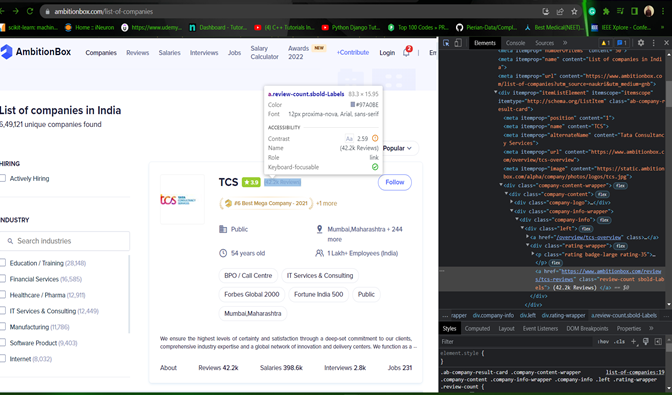

In [14]:
soup.find_all('a', class_ = 'review-count')

[<a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/tcs-reviews">
 								(42.2k Reviews)
 							</a>,
 <a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/accenture-reviews">
 								(28.1k Reviews)
 							</a>,
 <a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/cognizant-reviews">
 								(25.4k Reviews)
 							</a>,
 <a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/icici-bank-reviews">
 								(32.3k Reviews)
 							</a>,
 <a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/wipro-reviews">
 								(23.9k Reviews)
 							</a>,
 <a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/hdfc-bank-reviews">
 								(33.5k Reviews)
 							</a>,
 <a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/capgemini-reviews">
 								(20.6k Reviews)
 							</a>,
 <a class="review-count sbold-Labels

In [15]:
len(soup.find_all('a', class_ = 'review-count')) # Clearly , reviews of all the 30 companies

30

**So Instead of Extracting information one by one from each list, what we can aslo do is we can construct a loop and automate it for all the companies.** 

In [16]:
# variable which contains all the companies details.
company = soup.find_all('div',class_ = 'company-content-wrapper')

In [17]:
# Parsing through every item in the varible company.
for i in company:
    print(i.text.strip())

TCS
							 
								3.9
							 
								(42.2k Reviews)
							 Follow   #6 Best Mega Company - 2021   
						Public
					 
						Mumbai,Maharashtra + 244 more
					 
						54 years old
					 
						1 Lakh+ Employees (India)
					 
						BPO / Call Centre
					
						IT Services & Consulting
					
						Forbes Global 2000
					
						Fortune India 500
					
						Public
					
						Mumbai,Maharashtra
					  
				We ensure the highest levels of certainty and satisfaction through a deep-set commitment to our clients, comprehensive industry expertise and a global network of innovation and delivery centers.

We function as a full stakeholder to business, offering a consulting-led approach with an integrated portfolio of technology led solutions that encompass the entire Enterprise value chain. Our Customer-centric Engagement Model defines how we do engage with you, offering specialized services and solutions that meet the distinct needs of your business.

We build bespoke teams around yo

In [18]:
len(company)

30

So as we can clearly see that in the above cells that  'company'  has all 30 companies names with all of the other information in it.

We'll iterate through variable 'company' and extract the info of each company as per our need. 

**We'll be extrating the name, rating , reviews , company type(Public or Private) , headquaters , how old the company is and the number of employee working in the company.**

In [19]:
names = []
ratings = []
reviews = []
ctype = []
hq = []
age = []
emp = []

for info in company:
    
    names.append(info.find('h2').text.strip())  # use similar method for understanding purpose.
    ratings.append(info.find('p', class_ = 'rating').text.strip())
    reviews.append(info.find('a', class_ = 'review-count').text.strip())
    
    ctype.append(info.find_all('p' , class_ = 'infoEntity')[0].text.strip())
    hq.append(info.find_all('p' , class_ = 'infoEntity')[1].text.strip())
    age.append(info.find_all('p' , class_ = 'infoEntity')[2].text.strip())
    try:
        emp.append(info.find_all('p' , class_ = 'infoEntity')[3].text.strip())
    except:
        emp.append(np.nan)
        
print(names)
print("*************************************************************************************************")
print("*************************************************************************************************")
print(ratings)
print("*************************************************************************************************")
print("*************************************************************************************************")
print(reviews)
print("*************************************************************************************************")
print("*************************************************************************************************")
print(ctype)
print("*************************************************************************************************")
print("*************************************************************************************************")
print(hq)
print("*************************************************************************************************")
print("*************************************************************************************************")
print(age)
print("*************************************************************************************************")
print("*************************************************************************************************")
print(emp)

['TCS', 'Accenture', 'Cognizant', 'ICICI Bank', 'Wipro', 'HDFC Bank', 'Capgemini', 'HCL Technologies', 'Infosys', 'Tech Mahindra', 'Genpact', 'Axis Bank', 'IBM', 'Concentrix Corpo...', 'Amazon', 'Larsen & Toubro ...', 'Reliance jio', 'Vodafone Idea', 'HDB Financial Se...', 'Teleperformance', 'Kotak Mahindra B...', 'Reliance Industr...', 'Bharti Airtel', 'Tata Motors', 'Deloitte', 'Reliance Retail', 'Mahindra & Mahin...', 'IndusInd Bank', 'WNS', 'DXC Technology']
*************************************************************************************************
*************************************************************************************************
['3.9', '4.1', '4.0', '4.0', '3.9', '4.0', '3.9', '3.9', '4.0', '3.7', '4.0', '3.9', '4.2', '4.1', '4.2', '4.1', '4.0', '4.3', '4.0', '3.6', '3.9', '4.1', '4.1', '4.1', '4.1', '4.1', '4.1', '3.8', '3.7', '3.9']
*************************************************************************************************
****************************

So , this is all the information we have Extracted from the page 1 of the website.

### 2.2 Code for converting the above scraped data into a dataframe

**Now let us change the given number of lists into the dataframe** 

In [20]:
d = {'NAME':names,"RATINGS":ratings ,'COMPANY TYPE':ctype,'HEADQUATERS':hq,'EMPLOYEES':emp,'AGE':age,"REVIEWS":reviews}

In [21]:
df = pd.DataFrame(d)

In [22]:
df # DataFrame extracted from the 1st page.

,NAME,RATINGS,COMPANY TYPE,HEADQUATERS,EMPLOYEES,AGE,REVIEWS
0,TCS,3.9,Public,"Mumbai,Maharashtra + 244 more",1 Lakh+ Employees (India),54 years old,(42.2k Reviews)
1,Accenture,4.1,Public,"Dublin,Dublin + 133 more",1 Lakh+ Employees (India),33 years old,(28.1k Reviews)
2,Cognizant,4.0,Private,"Teaneck,New Jersey + 88 more",1 Lakh+ Employees (India),28 years old,(25.4k Reviews)
3,ICICI Bank,4.0,Public,"Mumbai,Maharashtra + 1001 more",50k-1 Lakh Employees (India),28 years old,(32.3k Reviews)
4,Wipro,3.9,Public,"Bangalore/Bengaluru,Karnataka + 254 more",1 Lakh+ Employees (India),77 years old,(23.9k Reviews)
5,HDFC Bank,4.0,Public,"Mumbai,Maharashtra + 1127 more",1 Lakh+ Employees (India),28 years old,(33.5k Reviews)
6,Capgemini,3.9,Public,Paris + 71 more,1 Lakh+ Employees (India),55 years old,(20.6k Reviews)
7,HCL Technologies,3.9,Public,"Noida,Uttar Pradesh + 159 more",1 Lakh+ Employees (India),46 years old,(20.3k Reviews)
8,Infosys,4.0,Public,"Bangalore/Bengaluru,Karnataka + 118 more",1 Lakh+ Employees (India),41 years old,(24.2k Reviews)
9,Tech Mahindra,3.7,Public,"Pune,Maharashtra + 186 more",50k-1 Lakh Employees (India),36 years old,(18.8k Reviews)


* **We have extracted data from 1 page , let's do it for multiple pages.**

* **The Websites has 333  pages for different unique companies and the website claims that it has 6,49,121 unique companies, but it does not seems true. Anyways Let's extract the Data from 100 pages.**

In [23]:
DF = pd.DataFrame()

for j in range(1,101): # parsing from page 1-100
    
    url = "https://www.ambitionbox.com/list-of-companies?page={}".format(j)
    
    webpage = requests.get(url).text
    
    soup = BeautifulSoup(webpage,"lxml")
    
    company = soup.find_all('div',class_ = 'company-content-wrapper')
    names = []
    ratings = []
    reviews = []
    ctype = []
    hq = []
    age = []
    emp = []
    
    
    for info in company:
        names.append(info.find('h2').text.strip())
        ratings.append(info.find('p', class_ = 'rating').text.strip())
        reviews.append(info.find('a', class_ = 'review-count').text.strip())
    
        try:
            ctype.append(info.find_all('p' , class_ = 'infoEntity')[0].text.strip())
            
        except:
            ctype.append(np.nan)
            
        try:
            hq.append(info.find_all('p' , class_ = 'infoEntity')[1].text.strip())
        
        except:
            hq.append(np.nan)
            
        try:
            age.append(info.find_all('p' , class_ = 'infoEntity')[2].text.strip())
            
        except:
            age.append(np.nan)
            
        try:
            emp.append(info.find_all('p' , class_ = 'infoEntity')[3].text.strip())
        
        except:
            emp.append(np.nan)
            
            
            
    d = {'NAME':names,'COMPANY TYPE':ctype,'HEADQUATERS':hq,'EMPLOYEES':emp,'AGE':age,"REVIEWS":reviews , "RATINGS":ratings }
    
    df=pd.DataFrame(d)
    
    DF = DF.append(df , ignore_index = True)
            
            

In [24]:
# Final DataSet:
# TOP 10 rows
DF.head(10) 

,NAME,COMPANY TYPE,HEADQUATERS,EMPLOYEES,AGE,REVIEWS,RATINGS
0,TCS,Public,"Mumbai,Maharashtra + 244 more",1 Lakh+ Employees (India),54 years old,(42.2k Reviews),3.9
1,Accenture,Public,"Dublin,Dublin + 133 more",1 Lakh+ Employees (India),33 years old,(28.1k Reviews),4.1
2,Cognizant,Private,"Teaneck,New Jersey + 88 more",1 Lakh+ Employees (India),28 years old,(25.4k Reviews),4.0
3,ICICI Bank,Public,"Mumbai,Maharashtra + 1001 more",50k-1 Lakh Employees (India),28 years old,(32.3k Reviews),4.0
4,Wipro,Public,"Bangalore/Bengaluru,Karnataka + 254 more",1 Lakh+ Employees (India),77 years old,(23.9k Reviews),3.9
5,HDFC Bank,Public,"Mumbai,Maharashtra + 1127 more",1 Lakh+ Employees (India),28 years old,(33.5k Reviews),4.0
6,Capgemini,Public,Paris + 71 more,1 Lakh+ Employees (India),55 years old,(20.6k Reviews),3.9
7,HCL Technologies,Public,"Noida,Uttar Pradesh + 159 more",1 Lakh+ Employees (India),46 years old,(20.3k Reviews),3.9
8,Infosys,Public,"Bangalore/Bengaluru,Karnataka + 118 more",1 Lakh+ Employees (India),41 years old,(24.2k Reviews),4.0
9,Tech Mahindra,Public,"Pune,Maharashtra + 186 more",50k-1 Lakh Employees (India),36 years old,(18.8k Reviews),3.7


In [25]:
# Last 10 Rows.
DF.tail(10)

,NAME,COMPANY TYPE,HEADQUATERS,EMPLOYEES,AGE,REVIEWS,RATINGS
2988,Thomson Digital,Private,Noida + 6 more,201-500 Employees (India),60 years old,(159 Reviews),3.2
2989,Meghalaya Cement...,Private,"Kolkata,West Bengal + 5 more",201-500 Employees (India),19 years old,(159 Reviews),3.9
2990,Hygienic Researc...,Private,"Mumbai,Maharashtra + 27 more",201-500 Employees (India),65 years old,(159 Reviews),4.4
2991,MapmyIndia,Public,"Delhi,NCT + 5 more",201-500 Employees (India),30 years old,(159 Reviews),3.9
2992,Muthoot Homefin ...,Private,"Mumbai,Maharashtra + 51 more",201-500 Employees (India),11 years old,(159 Reviews),3.5
2993,Banswara Syntex,Public,"Banswara,Rajasthan + 8 more",10k-50k Employees (India),46 years old,(159 Reviews),4.1
2994,National Institu...,Public,New Delhi + 26 more,51-200 Employees (Global),15 years old,(353 Reviews),4.2
2995,Billabong High I...,Public,"Noida,Uttar Pradesh + 17 more",51-200 Employees (India),13 years old,(158 Reviews),3.9
2996,Premium Transmis...,Private,"Pune,Maharashtra + 12 more",501-1k Employees (India),61 years old,(158 Reviews),3.7
2997,EASi,Private,"Hanover,Maryland + 6 more",501-1k Employees (India),41 years old,(158 Reviews),3.6


In [26]:
DF.shape

(2998, 7)

2998 rows and 7 columns

In [27]:
# Name of the Columns.
DF.columns

Index(['NAME', 'COMPANY TYPE', 'HEADQUATERS', 'EMPLOYEES', 'AGE', 'REVIEWS',
       'RATINGS'],
      dtype='object')

In [28]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NAME          2998 non-null   object
 1   COMPANY TYPE  2997 non-null   object
 2   HEADQUATERS   2989 non-null   object
 3   EMPLOYEES     2757 non-null   object
 4   AGE           2959 non-null   object
 5   REVIEWS       2998 non-null   object
 6   RATINGS       2998 non-null   object
dtypes: object(7)
memory usage: 164.1+ KB


In [29]:
DF.count()

NAME            2998
COMPANY TYPE    2997
HEADQUATERS     2989
EMPLOYEES       2757
AGE             2959
REVIEWS         2998
RATINGS         2998
dtype: int64

### Checking NAN values

In [30]:
# Checking for any Null or NaN values if any 
DF.isna().any()

NAME            False
COMPANY TYPE     True
HEADQUATERS      True
EMPLOYEES        True
AGE              True
REVIEWS         False
RATINGS         False
dtype: bool

In [31]:
# we need to find the features which have NAN values 
# using List Comprehension
## 1 -step make the list of features which has missing values
features_with_na = [features for features in DF.columns if DF[features].isnull().sum()>1] 
 # if there is atleast one NAN value we are considering that our dataset has NaN values

## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature , np.round(DF[feature].isnull().mean(), 4) ," % missing Values") 

# here we are rounding of the values of the feature upto 4 decimal
# Here we can conclude that these following columns have some or the other missing values

HEADQUATERS 0.003  % missing Values
EMPLOYEES 0.0804  % missing Values
AGE 0.013  % missing Values


We can notice that the missing values are very less which can be droped or we can also fill these values. We look this part in future.

In [32]:
import seaborn as sns

<AxesSubplot:>

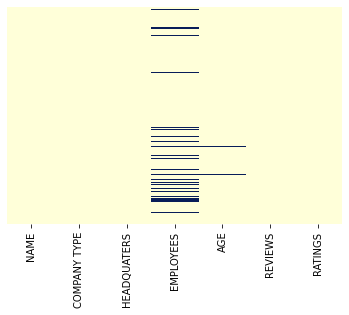

In [33]:
sns.heatmap(DF.isna(),yticklabels=False,cmap="YlGnBu",cbar=False)
# These blue lines are basically columns which shows the number of null values

In [34]:
DF.describe()

,NAME,COMPANY TYPE,HEADQUATERS,EMPLOYEES,AGE,REVIEWS,RATINGS
count,2998,2997,2989,2757,2959,2998,2998
unique,2947,234,2129,20,199,714,26
top,Labcorp Drug Dev...,Private,"Mumbai,Maharashtra + 9 more",1k-5k Employees (India),22 years old,(1.1k Reviews),4.1
freq,2,1855,10,1238,99,49,451


In [35]:
categorical_feature = [feature for feature in DF.columns if DF[feature].dtypes == "O" ]  # "O" is object/categorical Datatype
print("Number of categorical features {}".format(len(categorical_feature)))
categorical_feature  

Number of categorical features 7


['NAME',
 'COMPANY TYPE',
 'HEADQUATERS',
 'EMPLOYEES',
 'AGE',
 'REVIEWS',
 'RATINGS']

Every column in our dataset is object type only.

In [36]:
# we need to check how many numbers of unique features categorical values have (  CARDINALITY )
for feature in categorical_feature:
    print(" The feature is {} and number of categories are {}".format(feature,len(DF[feature].unique())))

 The feature is NAME and number of categories are 2947
 The feature is COMPANY TYPE and number of categories are 235
 The feature is HEADQUATERS and number of categories are 2130
 The feature is EMPLOYEES and number of categories are 21
 The feature is AGE and number of categories are 200
 The feature is REVIEWS and number of categories are 714
 The feature is RATINGS and number of categories are 26


### Handling Duplicate Values

In [37]:
duplicateRows = DF[DF.duplicated(["NAME"])]
len(duplicateRows)

51

So since we need to find the ratings of the unique companies only. We need to drop the duplicate rows from the NAME feature

In [38]:
DF.drop_duplicates("NAME",keep = 'first' , inplace = True)

In [39]:
DF.shape

(2947, 7)

In [40]:
# we need to check how many numbers of unique features categorical values have (  CARDINALITY )
for feature in categorical_feature:
    print(" The feature is {} and number of categories are {}".format(feature,len(DF[feature].unique())))

 The feature is NAME and number of categories are 2947
 The feature is COMPANY TYPE and number of categories are 235
 The feature is HEADQUATERS and number of categories are 2123
 The feature is EMPLOYEES and number of categories are 21
 The feature is AGE and number of categories are 199
 The feature is REVIEWS and number of categories are 712
 The feature is RATINGS and number of categories are 26


### Handling NaN values

Since the percentage of Null values in columns HEADQUATERS = 0.0033, EMPLOYEES = 0.0827  and AGE = 0.0133  , which is approx to zero only.
* we can either drop the rows havings Null values(which will not hinder our dataset as null values are very less) or we can use .fillna method where we can fill the NaN values of previous value in the column.
* Let's use .fillna method to fill the previous values

In [41]:
#filling the values column wise
DF = DF.fillna(method="bfill",axis=1) 

<AxesSubplot:>

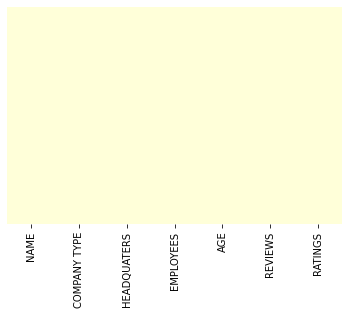

In [42]:
sns.heatmap(DF.isna(),yticklabels=False,cmap="YlGnBu",cbar=False)
# These blue lines are basically columns which shows the number of null values

**No Null Values can be seen**

In [43]:
DF.head()

,NAME,COMPANY TYPE,HEADQUATERS,EMPLOYEES,AGE,REVIEWS,RATINGS
0,TCS,Public,"Mumbai,Maharashtra + 244 more",1 Lakh+ Employees (India),54 years old,(42.2k Reviews),3.9
1,Accenture,Public,"Dublin,Dublin + 133 more",1 Lakh+ Employees (India),33 years old,(28.1k Reviews),4.1
2,Cognizant,Private,"Teaneck,New Jersey + 88 more",1 Lakh+ Employees (India),28 years old,(25.4k Reviews),4.0
3,ICICI Bank,Public,"Mumbai,Maharashtra + 1001 more",50k-1 Lakh Employees (India),28 years old,(32.3k Reviews),4.0
4,Wipro,Public,"Bangalore/Bengaluru,Karnataka + 254 more",1 Lakh+ Employees (India),77 years old,(23.9k Reviews),3.9


How many RATING values are there.

In [44]:
DF.RATINGS.value_counts()[:10].reset_index()

,index,RATINGS
0,4.1,444
1,4.0,392
2,4.2,386
3,3.9,350
4,3.8,287
5,4.3,280
6,3.7,177
7,4.4,143
8,3.6,128
9,3.5,81


## What is the Distribution of Ratings of Companies in the market

C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


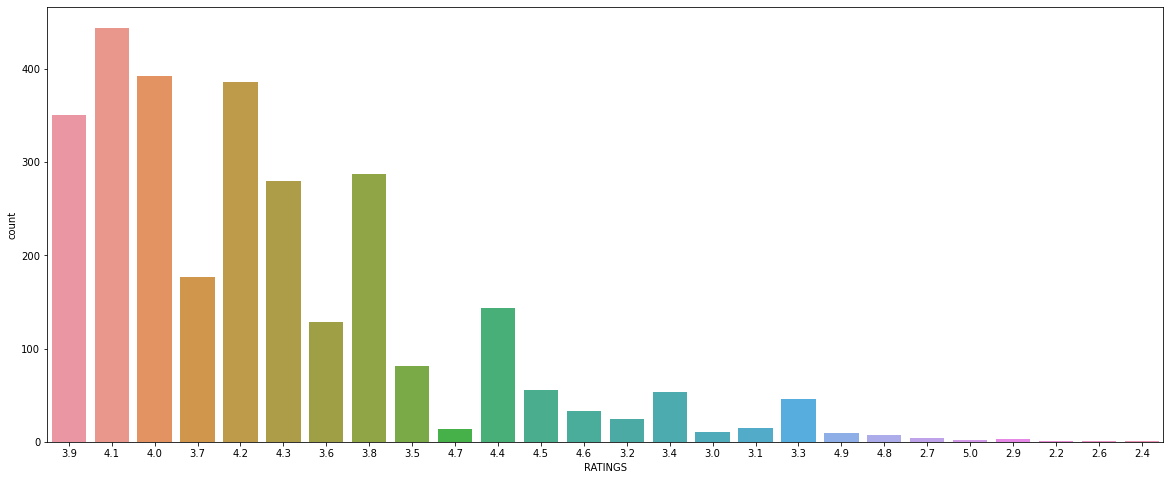

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.countplot(DF['RATINGS'])
plt.show()

Insights from the above graph:
* Companies with Ratings between 3.7 to 4.3 are most in the market

TOP 15 Companies with Highest RATINGS.

In [46]:
Name_Ratings = pd.DataFrame(DF.groupby('NAME')['RATINGS'].median())

In [47]:
Name_Ratings_top = Name_Ratings.sort_values('RATINGS',ascending = False )

In [48]:
Name_Ratings_top[:15]

,RATINGS
NAME,
Glorious Insight,5.0
Zovian Technolog...,5.0
Sistema Shyam Te...,4.9
E2logy Software ...,4.9
Top Office Pros ...,4.9
Taurus BPO Serv...,4.9
Appsierra,4.9
Mayoor School,4.9
Aurigo,4.9


LAST 15 Companies with Lowest RATINGS.

In [49]:
Name_Ratings_last = Name_Ratings.sort_values('RATINGS',ascending = True )

In [50]:
Name_Ratings_last[:15]

,RATINGS
NAME,
Lido Learning,2.2
DSM Infocom,2.4
Richfeel Health ...,2.6
OMICS Internatio...,2.7
INDIABULLS PHARM...,2.7
Better.com,2.7
Radical Minds,2.7
Tracxn,2.9
IndianMoney.com,2.9


In [51]:
# Changing the DataType of RATING Column as Float
DF['RATINGS'] = DF["RATINGS"].astype(float)

In [52]:
DF['RATINGS'].dtypes

dtype('float64')

## Making a Target Feature CLASS

Let's divide the RATINGS column in 4 different Class.
*  Class = 0 : Ratings above 4.5
* Class = 1 : Ratings b/wn 4.0 to 4.5
* Class = 2 : Ratings b/wn 3.5 to 4.0
* Class = 3 : Ratings less than 3.5


In [53]:
def CLASS(value):
    if value>=4.5:
        return 0
    elif 4.0<=value<4.5:
        return 1
    elif 3.5<=value<4.0:
        return 2
    
    else:
        return 3

In [54]:
DF['CLASS'] = DF['RATINGS'].apply(CLASS)

In [55]:
DF.head()

,NAME,COMPANY TYPE,HEADQUATERS,EMPLOYEES,AGE,REVIEWS,RATINGS,CLASS
0,TCS,Public,"Mumbai,Maharashtra + 244 more",1 Lakh+ Employees (India),54 years old,(42.2k Reviews),3.9,2
1,Accenture,Public,"Dublin,Dublin + 133 more",1 Lakh+ Employees (India),33 years old,(28.1k Reviews),4.1,1
2,Cognizant,Private,"Teaneck,New Jersey + 88 more",1 Lakh+ Employees (India),28 years old,(25.4k Reviews),4.0,1
3,ICICI Bank,Public,"Mumbai,Maharashtra + 1001 more",50k-1 Lakh Employees (India),28 years old,(32.3k Reviews),4.0,1
4,Wipro,Public,"Bangalore/Bengaluru,Karnataka + 254 more",1 Lakh+ Employees (India),77 years old,(23.9k Reviews),3.9,2


## How the Class is distributed in the market

C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


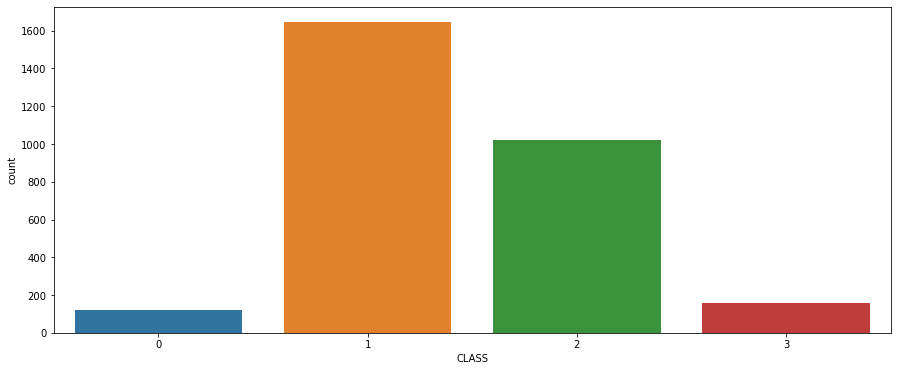

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.countplot(DF['CLASS'])
plt.show()

Most of the Companies are from class 1 . i.e. Ratings b/wn 4.0 to 4.5 and then followed by class 2 , 3 and 0.

## Relation B/wn Class and Rating

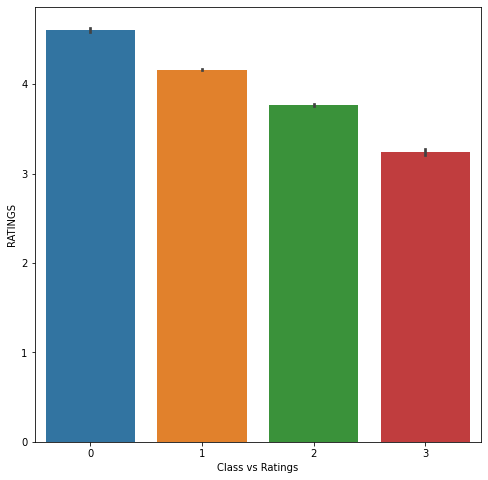

In [57]:
plt.figure(figsize=(8,8))
sns.barplot(x='CLASS',y="RATINGS",data=DF)
plt.xlabel("Class vs Ratings")
plt.show()

## How does the AGE is distributed 

C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


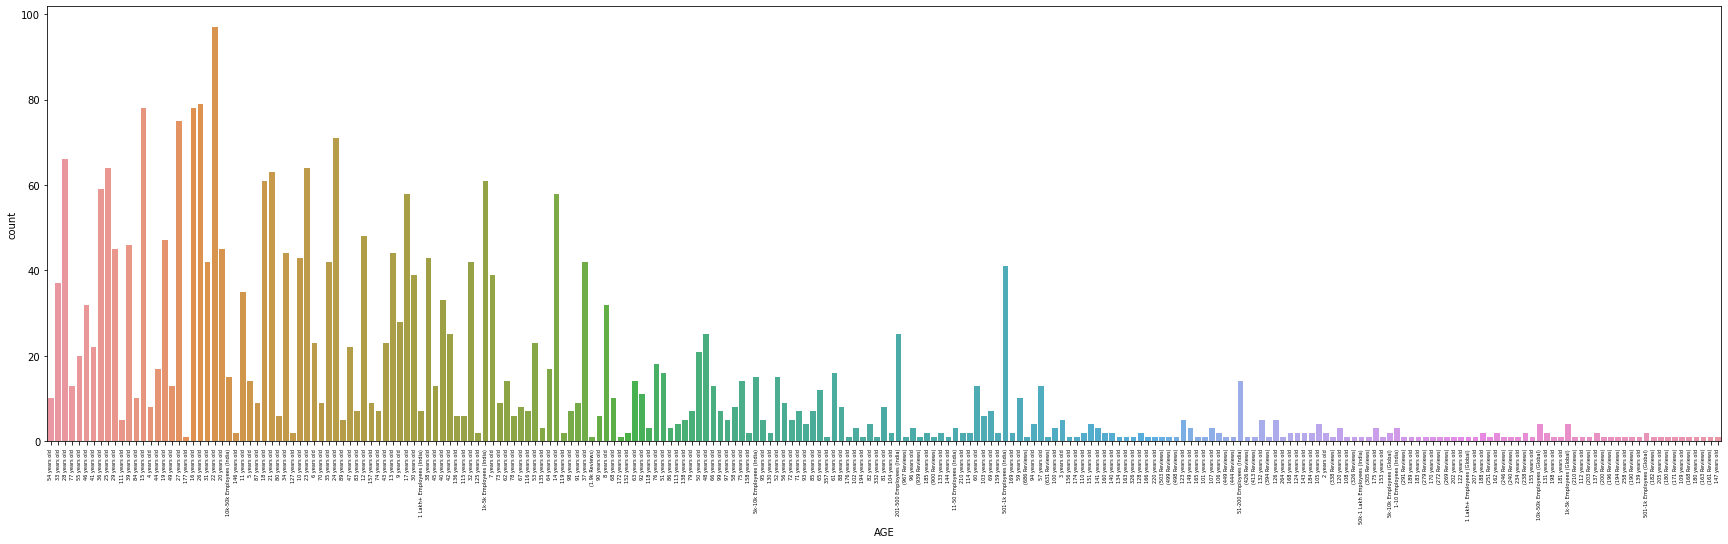

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
sns.countplot(DF['AGE'])
plt.xticks(rotation = 'vertical',size = 5)
plt.show()


Distributed Randomly.

In [59]:
DF.AGE.value_counts()[:10]

22 years old    97
26 years old    79
16 years old    78
15 years old    78
27 years old    75
24 years old    71
28 years old    66
25 years old    64
23 years old    64
21 years old    63
Name: AGE, dtype: int64

In [60]:
# MAking a New Cloumn based on the occurences of values in AGE column.
Age_Dict = DF['AGE'].value_counts()
DF['Encoded_AGE'] = DF['AGE'].map(Age_Dict)

In [61]:
DF.head()

,NAME,COMPANY TYPE,HEADQUATERS,EMPLOYEES,AGE,REVIEWS,RATINGS,CLASS,Encoded_AGE
0,TCS,Public,"Mumbai,Maharashtra + 244 more",1 Lakh+ Employees (India),54 years old,(42.2k Reviews),3.9,2,10
1,Accenture,Public,"Dublin,Dublin + 133 more",1 Lakh+ Employees (India),33 years old,(28.1k Reviews),4.1,1,37
2,Cognizant,Private,"Teaneck,New Jersey + 88 more",1 Lakh+ Employees (India),28 years old,(25.4k Reviews),4.0,1,66
3,ICICI Bank,Public,"Mumbai,Maharashtra + 1001 more",50k-1 Lakh Employees (India),28 years old,(32.3k Reviews),4.0,1,66
4,Wipro,Public,"Bangalore/Bengaluru,Karnataka + 254 more",1 Lakh+ Employees (India),77 years old,(23.9k Reviews),3.9,2,13


### Making a new Column based on the Column: Encoded_AGE

Dividing the Age of the Company on the basis of years
* Encoded_AGE more than 75 is High
* Encoded_AGE b/wn 50 yrs to 75 yrs  is Moderate
* Encoded_AGE Less than 50 yrs is Less

In [62]:
def Age_level(value):
    if value>=75:
        return('High')
    elif 50<=value<75:
        return('Moderate')
    else:
        return('Less')

In [63]:
DF['AGE_Division'] = DF['Encoded_AGE'].apply(Age_level)

In [64]:
DF.head()

,NAME,COMPANY TYPE,HEADQUATERS,EMPLOYEES,AGE,REVIEWS,RATINGS,CLASS,Encoded_AGE,AGE_Division
0,TCS,Public,"Mumbai,Maharashtra + 244 more",1 Lakh+ Employees (India),54 years old,(42.2k Reviews),3.9,2,10,Less
1,Accenture,Public,"Dublin,Dublin + 133 more",1 Lakh+ Employees (India),33 years old,(28.1k Reviews),4.1,1,37,Less
2,Cognizant,Private,"Teaneck,New Jersey + 88 more",1 Lakh+ Employees (India),28 years old,(25.4k Reviews),4.0,1,66,Moderate
3,ICICI Bank,Public,"Mumbai,Maharashtra + 1001 more",50k-1 Lakh Employees (India),28 years old,(32.3k Reviews),4.0,1,66,Moderate
4,Wipro,Public,"Bangalore/Bengaluru,Karnataka + 254 more",1 Lakh+ Employees (India),77 years old,(23.9k Reviews),3.9,2,13,Less


## How Age Division is distributed among the Companies

C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


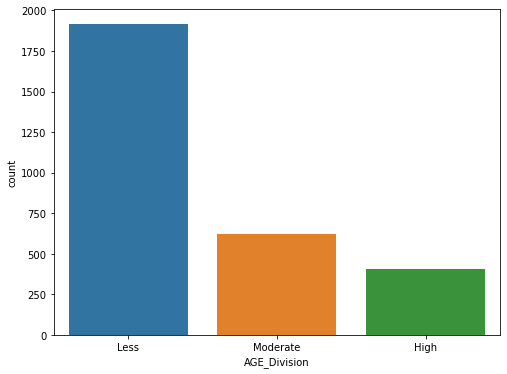

In [65]:
plt.figure(figsize=(8,6))
sns.countplot(DF['AGE_Division'])
plt.show()

## Relation b/wn Age_Division and Ratings

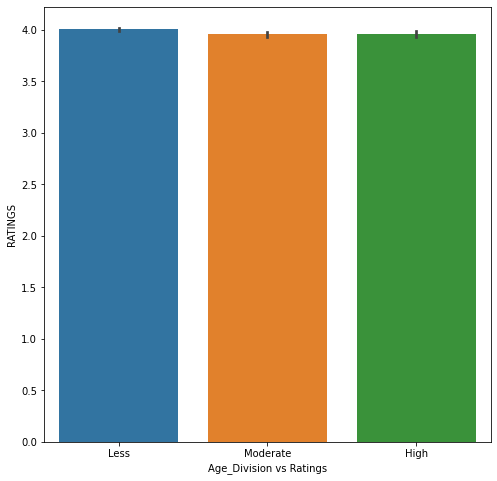

In [66]:
plt.figure(figsize=(8,8))
sns.barplot(x='AGE_Division',y="RATINGS",data=DF)
plt.xlabel("Age_Division vs Ratings")
plt.show()

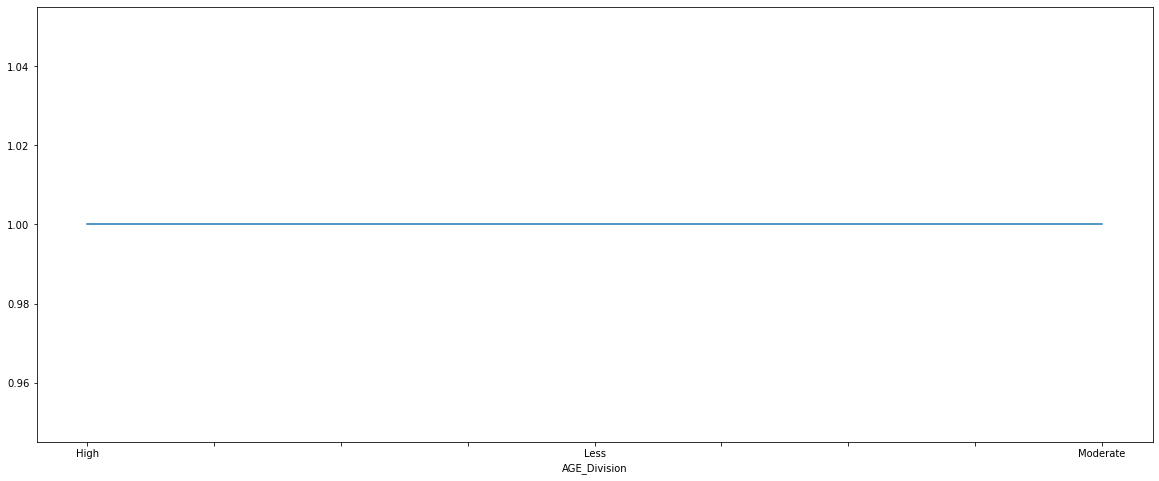

In [67]:
DF.groupby(['AGE_Division'])['CLASS'].median().plot(figsize=(20,8))
plt.show()

### How Age and Ratings are related

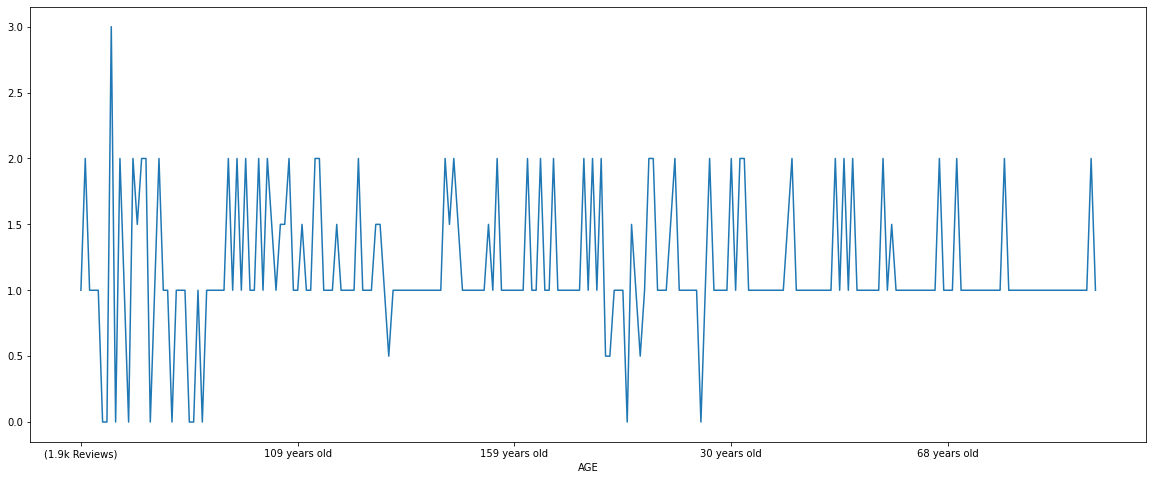

In [68]:
DF.groupby(['AGE'])['CLASS'].median().plot(figsize=(20,8))
plt.show()

## Changing the AGE Column into Numerical Encoded Values
* Method used is Mean Encoding.
* we'll see it for other columns to further;)

In [69]:
Encoded_Mean_Dict = DF.groupby(['AGE'])['CLASS'].mean().to_dict()
DF['AGE_Encoded'] = DF['AGE'].map(Encoded_Mean_Dict)

In [70]:
DF[['AGE','AGE_Encoded']].head(10)

,AGE,AGE_Encoded
0,54 years old,1.300000
1,33 years old,1.486486
2,28 years old,1.454545
3,28 years old,1.454545
4,77 years old,1.230769
5,28 years old,1.454545
6,55 years old,1.250000
7,46 years old,1.531250
8,41 years old,1.272727
9,36 years old,1.440678


In [71]:
DF = DF.drop('AGE', axis = 1)

## Relation between Age_Encoded and Ratings

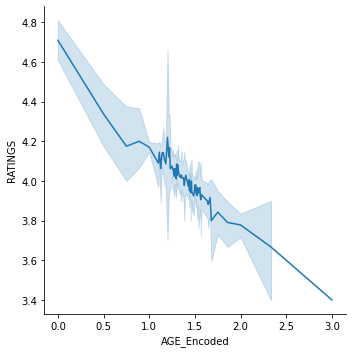

In [72]:
sns.relplot(data = DF , x ='AGE_Encoded',y='RATINGS',kind = 'line')

WE CAN CLEARLY SEE ABOVE THAT THE AGE_ENCODED(AGE INDIRECTLY) IS NEGATIVELY CORRELATED WITH RATINGS

Let's Drop the Encoded_AGE now .

In [73]:
DF = DF.drop(['Encoded_AGE'], axis = 1)

In [74]:
DF.head()

,NAME,COMPANY TYPE,HEADQUATERS,EMPLOYEES,REVIEWS,RATINGS,CLASS,AGE_Division,AGE_Encoded
0,TCS,Public,"Mumbai,Maharashtra + 244 more",1 Lakh+ Employees (India),(42.2k Reviews),3.9,2,Less,1.300000
1,Accenture,Public,"Dublin,Dublin + 133 more",1 Lakh+ Employees (India),(28.1k Reviews),4.1,1,Less,1.486486
2,Cognizant,Private,"Teaneck,New Jersey + 88 more",1 Lakh+ Employees (India),(25.4k Reviews),4.0,1,Moderate,1.454545
3,ICICI Bank,Public,"Mumbai,Maharashtra + 1001 more",50k-1 Lakh Employees (India),(32.3k Reviews),4.0,1,Moderate,1.454545
4,Wipro,Public,"Bangalore/Bengaluru,Karnataka + 254 more",1 Lakh+ Employees (India),(23.9k Reviews),3.9,2,Less,1.230769


## Relation b/wn Company Tpye and Ratings

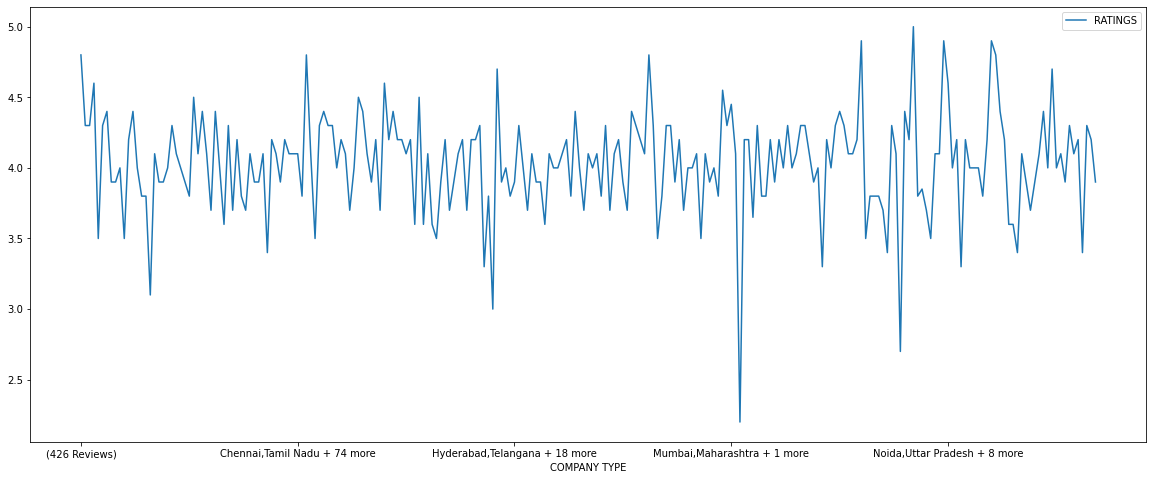

In [75]:
pd.DataFrame(DF.groupby(['COMPANY TYPE'])['RATINGS'].median()).plot(figsize=(20,8))
plt.show()


## Handling other Categorical Data(Changing into numerical features)

## Mean Encoding
Description: Simillar to target/guided encoding only difference is here we replace category with the mean value with respect to target column.

Let's implement it with NAME and CLASS target column.

In [76]:
Encoded_Mean_Dict = DF.groupby(['NAME'])['CLASS'].mean().to_dict()

DF['NAME_Encoded'] = DF['NAME'].map(Encoded_Mean_Dict)

In [77]:
DF[['NAME','NAME_Encoded']].head()

,NAME,NAME_Encoded
0,TCS,2.0
1,Accenture,1.0
2,Cognizant,1.0
3,ICICI Bank,1.0
4,Wipro,2.0


Now Since the Categorical Column has been changed into the Numerical value we can drop the original Column

In [78]:
DF = DF.drop('NAME', axis = 1)

**Similarly we can replace every Categorical Columns present in our Dataset with its Mean Encoded Column**

Let's implement it with COMPANY TYPE and CLASS target column.

In [79]:
Encoded_Mean_Dict = DF.groupby(['COMPANY TYPE'])['CLASS'].mean().to_dict()
DF['COMPANY TYPE_Encoded'] = DF['COMPANY TYPE'].map(Encoded_Mean_Dict)
DF = DF.drop('COMPANY TYPE', axis = 1)

Let's implement it with EMPLOYEES and CLASS target column.

In [80]:
Encoded_Mean_Dict = DF.groupby(['EMPLOYEES'])['CLASS'].mean().to_dict()
DF['EMPLOYEES_Encoded'] = DF['EMPLOYEES'].map(Encoded_Mean_Dict)
DF = DF.drop('EMPLOYEES', axis = 1)

Let's implement it with REVIEWS and CLASS target column.

In [81]:
Encoded_Mean_Dict = DF.groupby(['REVIEWS'])['CLASS'].mean().to_dict()
DF['REVIEWS_Encoded'] = DF['REVIEWS'].map(Encoded_Mean_Dict)
DF = DF.drop('REVIEWS', axis = 1)

Let's implement it with HEADQUATERS and CLASS target column.

In [82]:
Encoded_Mean_Dict = DF.groupby(['HEADQUATERS'])['CLASS'].mean().to_dict()
DF['HEADQUATERS_Encoded'] = DF['HEADQUATERS'].map(Encoded_Mean_Dict)
DF = DF.drop('HEADQUATERS', axis = 1)

Let's implement it with AGE_Division and CLASS target column.

In [83]:
Encoded_Mean_Dict = DF.groupby(['AGE_Division'])['CLASS'].mean().to_dict()
DF['AGE_Division_Encoded'] = DF['AGE_Division'].map(Encoded_Mean_Dict)
DF = DF.drop('AGE_Division', axis = 1)

## Relation between each feature and Target feature CLASS

NAME_ENCODED AND CLASS

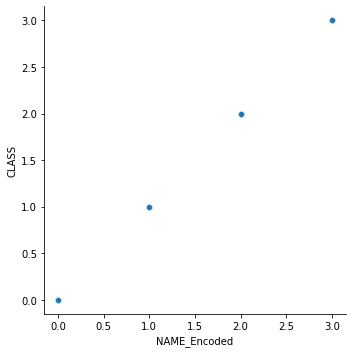

In [84]:
sns.relplot(data = DF , x ='NAME_Encoded',y='CLASS',kind = 'scatter')

COMPANY TYPE_ENCODED AND CLASS

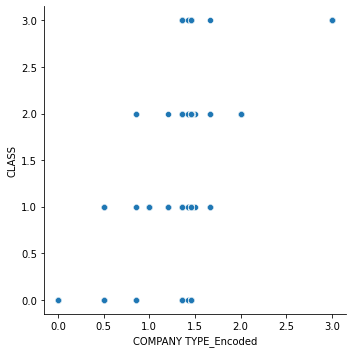

In [85]:
sns.relplot(data = DF , x ='COMPANY TYPE_Encoded',y='CLASS',kind = 'scatter')

EMPLOYEES_ENCODED AND CLASS

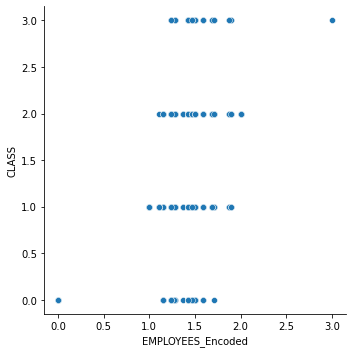

In [86]:
sns.relplot(data = DF , x ='EMPLOYEES_Encoded',y='CLASS',kind = 'scatter')

REVIEWS_ENCODED AND CLASS

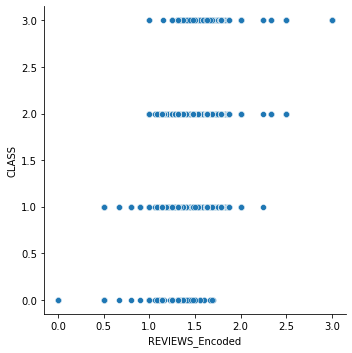

In [87]:
sns.relplot(data = DF , x ='REVIEWS_Encoded',y='CLASS',kind = 'scatter')

HEADQUATERS_ENCODED AND CLASS 

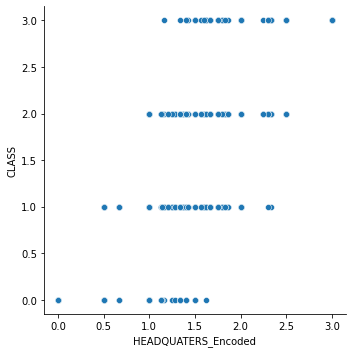

In [88]:
sns.relplot(data = DF , x ='HEADQUATERS_Encoded',y='CLASS',kind = 'scatter')

AGE_ENCODED AND CLASS

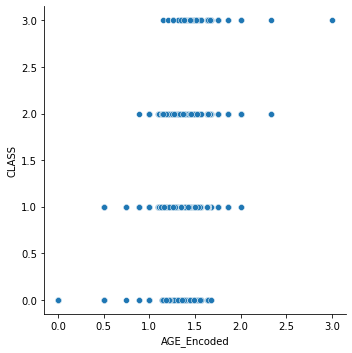

In [89]:
sns.relplot(data = DF , x = 'AGE_Encoded',y='CLASS',kind = 'scatter')

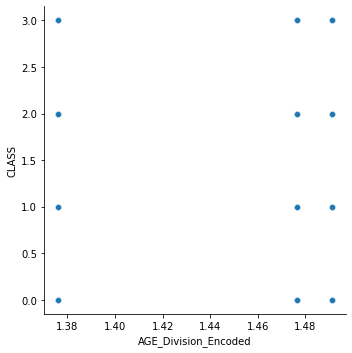

In [90]:
sns.relplot(data = DF , x = 'AGE_Division_Encoded',y='CLASS',kind = 'scatter')

In [91]:
DF.head()

,RATINGS,CLASS,AGE_Encoded,NAME_Encoded,COMPANY TYPE_Encoded,EMPLOYEES_Encoded,REVIEWS_Encoded,HEADQUATERS_Encoded,AGE_Division_Encoded
0,3.9,2,1.300000,2.0,1.357733,1.151515,2.0,2.0,1.375979
1,4.1,1,1.486486,1.0,1.357733,1.151515,1.0,1.0,1.375979
2,4.0,1,1.454545,1.0,1.454695,1.151515,1.0,1.0,1.491200
3,4.0,1,1.454545,1.0,1.357733,1.266667,1.0,1.0,1.491200
4,3.9,2,1.230769,2.0,1.357733,1.151515,2.0,2.0,1.375979


## Distribution of the Dataset (Skewed or Not)

Now Since we have converted all the columns into numerical values we shall plot them and see their distribution.
* If skewed we need to change it into LogNormal Distribution

In [92]:
from scipy.stats import skew

RATINGS
-0.6229952912496448


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


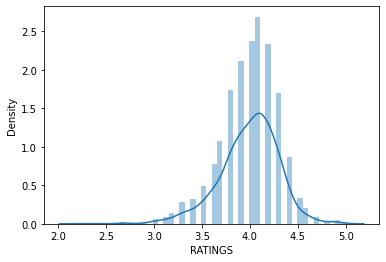

CLASS
0.4576725552241466


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


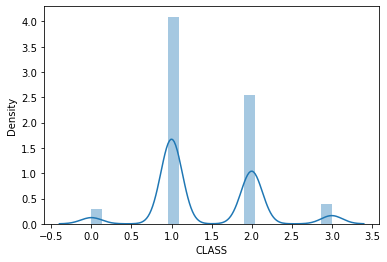

AGE_Encoded
-1.3226280015781118


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


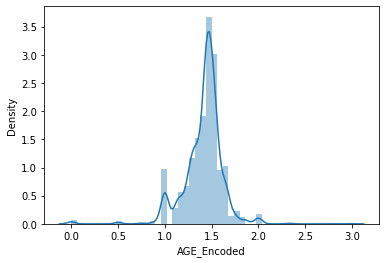

NAME_Encoded
0.4576725552241466


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


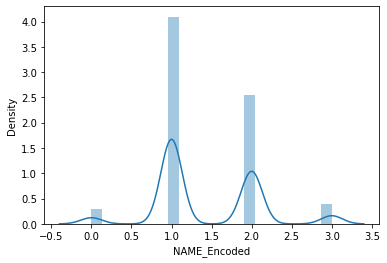

COMPANY TYPE_Encoded
-0.3144201540414124


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


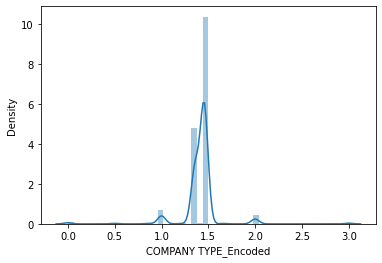

EMPLOYEES_Encoded
-3.088707760342755


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


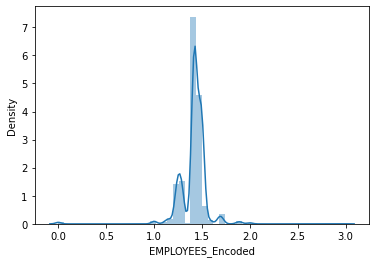

REVIEWS_Encoded
0.42322913128685674


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


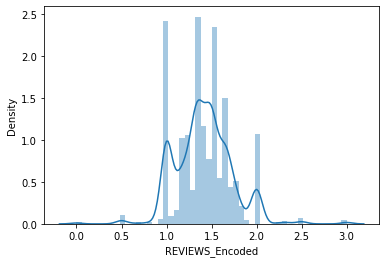

HEADQUATERS_Encoded
0.3887664405765389


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


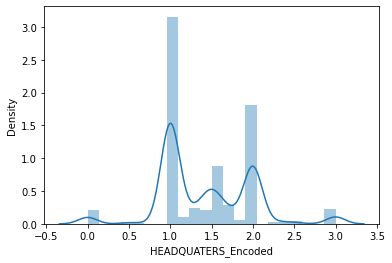

AGE_Division_Encoded
0.6479150171665065


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


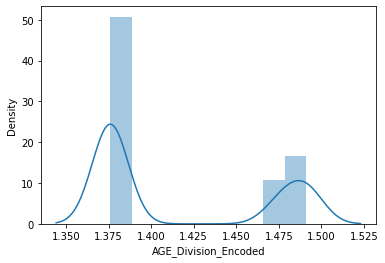

In [93]:
for col in DF:
    print(col)
    print(skew(DF[col]))
    
    
    plt.figure()
    sns.distplot(DF[col])
    plt.show()
    

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution.

A value between 0.5 and 1 or -0.5 and -1 is moderately skewed.

A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

* We can observe that:
* AGE_Encoded ,EMPLOYEES_Encoded column  column is highly skewed
* AGE_Division_Encoded , RATINGS column  column is Moderately skewed
* HEADQUATERS_Encoded , REVIEWS_Encoded , COMPANY TYPE_Encoded , CLASS column  column is fairly symmetrical.

**But before we change the data into logNormal or Sqaureroot distribution we need to check the correlation b/wn the dependent and independent features.**

As once changed into the logNormal distribution the correlation b/wn dependent and independent features values changes

Also we cannot change the Negative value of skewness into the LogNormal or Squareroot as it will give us the NaN value

In [94]:
#lET'S CHECK THE CORRELATION B/WN THE DEPENDENT AND INDEPENDENT FEATURES

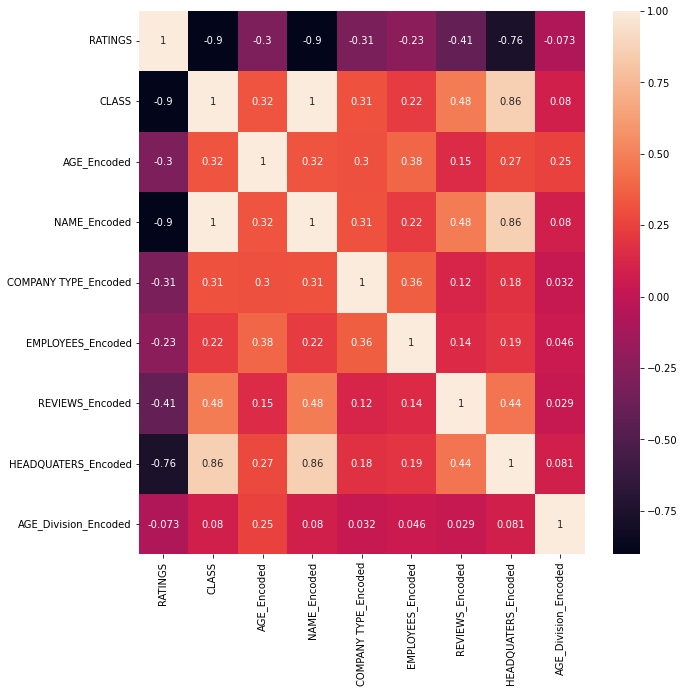

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(DF.corr(),annot=True)
plt.show()

**We can Observe the following from the above heatmap:**

we need to check the features(independent feature) vs CLASS(dependent feature).

**Higly correlated with CLASS( Cannot change )**

* HEADQUATERS_Encoded
* RATINGS
* NAME_Encoded

**Moderately correlated with Price(Can be changed)**
* AGE_Encoded 
* EMPLOYEES_Encoded 
* REVIEWS_Encoded
* COMPANY TYPE_Encoded 


Least correlated with Price(Definitely should be changed but it's not skewed
* AGE_Division_Encoded



## Changing the Columns into LogNormal Distribution

In [96]:
DF["AGE_Division_Encoded"] = np.log(DF["AGE_Division_Encoded"])

In [97]:
 # DF["REVIEWS_Encoded"] = np.log(DF["REVIEWS_Encoded"])

we Cannot change the 'AGE_Encoded', EMPLOYEES_Encoded ,COMPANY TYPE_Encoded feature into LogNormal Distribution because it is a  negative value (as it will give us NaN values)

## Dataset Now

In [98]:
DF.head()

,RATINGS,CLASS,AGE_Encoded,NAME_Encoded,COMPANY TYPE_Encoded,EMPLOYEES_Encoded,REVIEWS_Encoded,HEADQUATERS_Encoded,AGE_Division_Encoded
0,3.9,2,1.300000,2.0,1.357733,1.151515,2.0,2.0,0.319166
1,4.1,1,1.486486,1.0,1.357733,1.151515,1.0,1.0,0.319166
2,4.0,1,1.454545,1.0,1.454695,1.151515,1.0,1.0,0.399581
3,4.0,1,1.454545,1.0,1.357733,1.266667,1.0,1.0,0.399581
4,3.9,2,1.230769,2.0,1.357733,1.151515,2.0,2.0,0.319166


In [100]:
DF.to_csv("C:/Users/AYUSH GUPTA/Data Science_1/Data science/Web scraping/DataFrame_2.csv", index = False)

## Spliting the Dataset into Train and Test sub datasets

In [101]:
# Imorting Library
from sklearn.model_selection import train_test_split

In [102]:
# X is a varibale for all independent features
X= DF.drop(['CLASS'],axis=1)
#print(X)
Y = DF[['CLASS']]
#print(Y)

#Splitting the Data into Training and Testing data
# Train and testing the data
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=100)

# Test size is taken 20% of total Dataset , Whereas Train Size is 80% of total dataset